# Problem-1

In [6]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization

In [9]:
batch_size=128
num_classes=10
epochs=20

In [10]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print('Shape-x:\t',xtrain.shape)
print('Shape-y:\t',ytrain.shape)

11490434/11490434 [==============================] - 3s 0us/step
Shape-x:	 (60000, 28, 28)
Shape-y:	 (60000,)


In [11]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)
print('Shape-x-train:\t',xtrain.shape)
print('Shape-x-Test:\t',xtest.shape)

Shape-x-train:	 (60000, 784)
Shape-x-Test:	 (10000, 784)


In [12]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [13]:
xtrain=xtrain/255.
xtest=xtest/255.

In [14]:
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

60000 train samples
10000 test samples


In [15]:
import keras
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

In [16]:
ytrain.shape

(60000, 10)

In [25]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes,activation='softmax'))
optm=SGD(learning_rate=0.01,momentum=0.9)

model.compile(loss='binary_crossentropy',optimizer=optm,metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 671754 (2.56 MB)
Trainable params: 670730 (2.56 MB)
Non-trainable params: 1024 (4.00 KB)
_________________________________________________________________


In [28]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=30,verbose=1)

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0123 - accuracy: 0.9862 - val_loss: 0.0148 - val_accuracy: 0.9805
Epoch 2/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0099 - accuracy: 0.9894 - val_loss: 0.0138 - val_accuracy: 0.9815
Epoch 3/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0081 - accuracy: 0.9925 - val_loss: 0.0135 - val_accuracy: 0.9814
Epoch 4/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0068 - accuracy: 0.9941 - val_loss: 0.0129 - val_accuracy: 0.9829
Epoch 5/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0057 - accuracy: 0.9959 - val_loss: 0.0123 - val_accuracy: 0.9826
Epoch 6/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0048 - accuracy: 0.9969 - val_loss: 0.0124 - val_accuracy: 0.9828
Epoch 7/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0042 - accuracy: 0.9974 - val_loss: 0.0124 - val_ac

In [30]:
_,train_acc=model.evaluate(xtrain,ytrain,verbose=1)
_,test_acc=model.evaluate(xtest,ytest,verbose=1)
print('Train Accuracy:\t',train_acc)
print()
print('Test Accuracy:\t',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0124 - accuracy: 0.9843
Train Accuracy:	 1.0

Test Accuracy:	 0.9843000173568726


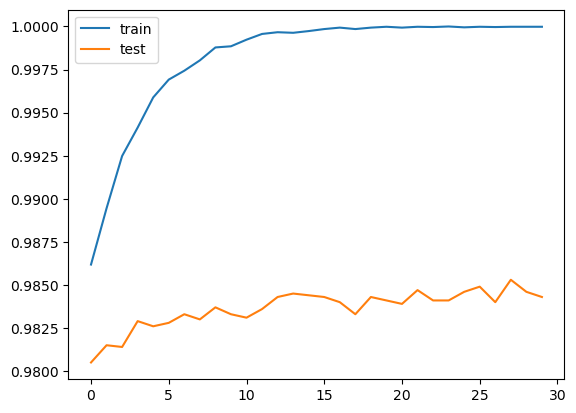

In [31]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

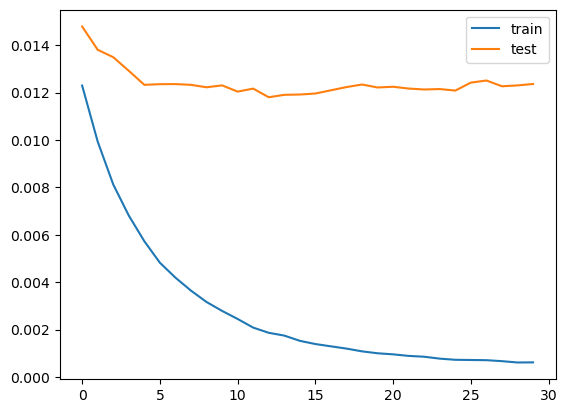

In [34]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

# Problem-2

In [8]:
pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   -------------------------------------- - 122.9/128.9 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 128.9/128.9 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import keras_tuner
from kerastuner.tuners import Hyperband

C:\Users\Sravan Kumar\AppData\Local\Temp\ipykernel_17764\781521953.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.engine.hyperparameters import HyperParameter

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', 32, 128, step=32), activation='relu'))
        model.add(layers.Dropout(0.2))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='keras_tuner_dir',
    project_name='mnist_hyperband'
)

tuner.search(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hps)

best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Trial 30 Complete [00h 00m 54s]
val_accuracy: 0.9562000036239624

Best val_accuracy So Far: 0.978600025177002
Total elapsed time: 00h 13m 13s
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3859 - accuracy: 0.8849 - val_loss: 0.1400 - val_accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1852 - accuracy: 0.9472 - val_loss: 0.1037 - val_accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1454 - accuracy: 0.9579 - val_loss: 0.0926 - val_accuracy: 0.9710
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1258 - accuracy: 0.9636 - val_loss: 0.0811 - val_accuracy: 0.9746
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1097 - accuracy: 0.9680 - val_loss: 0.0818 - val_accuracy: 0.9757
